In [1]:
import os
import sys

print(os.getcwd())
cwd0 = '../config/'
sys.path.append(cwd0)

import visualID_Eng as vID
from visualID_Eng import color
vID.init(cwd0)
import tools4PytChem as t4p

/home/romuald/ENSEIGNEMENT/0-JupyterNotebooks/PytChem/ExercisesProjects


**Start at:** Sunday 01 January 2023, 15:24:36  
**Hostname:** ip-sw-install-nico.insa-toulouse.fr (Linux)

<p style="text-align: center"><img width="800px" src="../config/svg/logoPytChem.svg" style="margin-left:auto; margin-right:auto"/></p>

# Projet : interprétation des spectres d'absorption UV-visibles de cyanines et de polyènes conjugués

## Objectif

Le projet est basé sur l'article *Why the Particle-in-a-Box Model Works Well for Cyanine Dyes but Not for Conjugated Polyenes*  de J. Autschbach (*J. Chem. Educ.* **84**: 1840-1845, **2007**, Ref. [1])

Il s'agit d'interpréter les spectres d'absorption UV-visibles de molécules conjuguées linéaires, telles que le butadène, l'hexatriène, l'octatetraène... On sait de longue date (voir Ref. [2]), que la longueur d'onde maximale d'absorption des polyènes augmente en fonction de la taille du système conjugué : on parle **d'effet batochrome**. Ci-dessous les spectres de plusieurs diméthylpolyènes, qui montrent ce décalage des spectres d'absorption vers des domaines de longueur d'onde élevée :

<p style="text-align: center"><img width="450px" src="MiscImages/VUV-ConjugatedSystems/SpectresVis-DiMePolyenes.png" style="margin-left:auto; margin-right:auto" id="img_VisPolyenes"></img><br> <b>Figure 1</b>. Extrait de la Réf. [2]</p>

<div class="warn">
    
On va chercher à comprendre cet effet batochrome, c'est-à-dire si on peut trouver une relation entre la bande d'intensité maximale de chaque spectre, observée à la longueur d'onde $\lambda_\mathrm{max}$, et la taille du système conjugué, *n*. On va considérer deux cas différents : des **cyanines** et des **diméthylpolyènes**. 
    
</div>

## Cadre théorique

### Origine des bandes d'absorption d'un spectre Visible-UV de molécules

On rappelle d'abord que l'énergie des atomes et des molécules est *quantifiée*

L'interaction entre entre un photon du domaine Visible - UV et une molécule entraîne l'excitation des électrons depuis une orbitale occupée vers une orbitale vide, à condition que la différence d'énergie entre les deux orbitales soit reliée à la longueur d'onde du photon. Dans le cas des spectres d'absorption de molécules possédant un système π, la bande expérimentale observée à $\lambda_\mathrm{max}$ est généralement due à l'excitation d'un électron qui occupe la plus haute orbitale occupée π (la **HO**) vers la plus basse des orbitales vides π (la **BV**) :
<p style="text-align: center"><img width="450px" src="MiscImages/VUV-ConjugatedSystems/PrincipeAbsorption.png" style="margin-left:auto; margin-right:auto" id="img_PpeAbsHOBV"></img><br> <b>Figure 2</b></p>

Et $\lambda_\mathrm{max}$ est reliée à la différence d'énergie HO-BV *via* la relation de Planck-Einstein :

$$\Delta E = E(\mathrm{BV})-E(\mathrm{HO}) = \frac{hc}{\lambda_\mathrm{max}}$$

où *c* est la vitesse de la lumière et *h* est la constante de Planck.

### Rappel sur la conjugaison

Un système conjugué est un système chimique constitué d'atomes liés par des liaisons covalentes avec au moins une liaison π délocalisée. C'est le cas par exemple du benzène. Sa structure de Lewis présente 3 liaisons doubles sur les 6 liaisons présentes entre les atomes de carbone. Du fait de l'existence de 2 formes mésomères équivalentes, les électrons π se délocalisent sur l'ensemble du squelette carboné en apportant un caractère de liaison double sur l'ensemble des 6 liaisons C-C. C'est ce qu'on résumé par l'hybride de résonance ci-dessous :

<p style="text-align: center"><img width="550px" src="MiscImages/VUV-ConjugatedSystems/resonanceBenzene.png" style="margin-left:auto; margin-right:auto" id="img_PpeAbsHOBV"></img><br> <b>Figure 3</b></p>

On constate exactement le même phénomène dans tout polyène ouvert ou cyclique qui présente une "alternance" liaison double - liaison simple - liaison double etc..., résumé par **π-σ-π**, ce qui est le cas des polyènes linéaires conjugués tel que le diméthyl-hexatriène ci-dessous :

<p style="text-align: center"><img width="550px" src="MiscImages/VUV-ConjugatedSystems/deloc-diMehexatriène.png" style="margin-left:auto; margin-right:auto" id="img_PpeAbsHOBV"></img><br> <b>Figure 4</b></p>

Les électrons π se délocalisent tout le long du squelette carboné, c'est-à-dire que ils ne restent pas localisés entre deux atomes au contraire d'électrons σ.

### Expression théorique des énergies $E(\mathrm{HO})$ et $E(\mathrm{BV})$

Il existe un modèle théorique qui consiste à considérer que les électrons π sont libres de se déplacer librement tout le long du squelette carboné. Ont dit qu'ils ont libres dans un puits de potentiel, dont les limites correspondent à la dimension du squelette carboné, comme illustré ci-dessous pour l'hexatriène :

<p style="text-align: center"><img width="340px" src="MiscImages/VUV-ConjugatedSystems/Puis1D-hexatrieneSmall.png" style="margin-left:auto; margin-right:auto" id="img_Hexatriene-Puits1DSmall"></img><br> <b>Figure 5</b></p>

On ne va pas rentrer ici dans des détails théoriques, mais ce modèle dit du "**puits de potentiel infiniment profond**" se résoud dans le cadre de la théorique quantique, ce qui fait fait apparaître la **quantification de l'énergie** des électrons π des molécules conjuguées linéaires. L'équation à résoudre s'écrit :
$$-\frac{\hbar^{2}}{2m}\frac{d^{2}\psi}{dx^{2}}=E\psi(x)$$

La résolution de cette équation différentielle, en prenant en compte les conditions aux limites, mène aux solutions :

$$\psi_{n}(x)=\sqrt{\frac{2}{L}}\sin\left(\frac{n\pi}{L}x\right)$$

$$E_{n}=n^{2}\frac{\pi^{2}\hbar^{2}}{2m_eL^{2}}$$

où *L* est la largeur du puits, $\hbar$ est la constante de Planck réduite et $m_e$ est la masse de l'électron.

$E_{n}$ est l'énergie des états accessibles aux électrons π, qu'on va appeler des orbitales. Elle dépend d'un nombre entier $n$, qui est un nombre entier qui peut prendre toute valeur comprise entre 1 et +∞.

$\psi_{n}(x)$ est l'orbitale elle-même. Elle contient une information sur la probabilité de présence des électrons dans l'espace qui leur est accessible le long du squelette σ. Une orbitale ne peut héberger plus de deux électrons en vertu du **principe d'exclusion de Pauli**, lequel imposé galement que les moments magnétiques de spin soient opposés (états de spin α et β). Enfin, il faut savoir que l'ordre de remplissage des orbitales se fait en fonction de leur ordre énergétique. Pour l'hexa-2,4,6-triène, voici à quoi ressemble qualitativement le diagramme énergétique de ses orbitales π :

<p style="text-align: center"><img width="170px" src="MiscImages/VUV-ConjugatedSystems/MOs-hexatriene.png" style="margin-left:auto; margin-right:auto" id="img_Hexatriene-MOs"></img><br> <b>Figure 6</b></p>

### Plan de travail

<div class="rq">
    
Dans ce projet on va principalement chercher à interpréter l'effet batochrome d'une part en ayant en tête le schéma de principe ci-dessous :
    
<p style="text-align: center"><img width="450px" src="MiscImages/VUV-ConjugatedSystems/PrincipeAbsorption.png" style="margin-left:auto; margin-right:auto" id="img_PpeAbsHOBV"></img><br> <b>Figure 7</b></p>

et en utilisant les relations :
    
$$E_{n}=n^{2}\frac{\pi^{2}\hbar^{2}}{2m_eL^{2}}$$
    
$$\Delta E = E(\mathrm{BV})-E(\mathrm{HO}) = \frac{hc}{\lambda_\mathrm{max}}$$

On va voir dans un **premier temps (cas des cyanines)**, que ce modèle permet de bien reproduire les longueurs d'onde expérimentales, à condition **d'ajuster** la dimension du puits. On va voir qu'il faut augmenter un peu sa taille, afin de prendre en compte des **effets de bord**. Il n'est pas déraisonnable en effet de penser que les électrons π ne vont pas brutalement s'arrêter à la frontière définie par la position des atomes terminaux du squelette carboné. C'est ce qui est résumé ci-dessous, toujours pour l'hexatriène : 

<p style="text-align: center"><img width="430px" src="MiscImages/VUV-ConjugatedSystems/Puis1D-hexatrieneLarge.png" style="margin-left:auto; margin-right:auto" id="img_Hexatriene-Puits1DLarge"></img><br> <b>Figure 8</b></p>

Puis dans un **deuxième temps (cas des polyènes conjugués)**, on va voir que ce modèle permet de bien reproduire les longueurs d'onde expérimentales, à condition **d'ajuster** à la fois la dimension du puits ainsi qu'un paramètre correctif de l'énergie de HO, qui sera le même quelle que soit la taille du polyène. 

</div>

### Comment va-t-on comparer longueurs d'onde issues des modèles et longueur d'onde expérimentales ?

Le plus courant est de vérifier graphiquement l'accord entyre modèles et expérience. On suggère de reporter sur un graphique les valeurs théoriques en fonction des valeurs expérimentales sur un graphe carré ayant la même échelle des abscisses et des ordonnées, et de tracer également la diagonale du carré. Si les valeurs théoriques sont proches de la diagonale, c'est que l'accord théorie-expérience est bon. Sinon à vous de juger si l'écart est significatif ou pas. Par exemple :

<p style="text-align: center"><img width="1200px" src="MiscImages/VUV-ConjugatedSystems/Comparaison théorie-expérience.png" style="margin-left:auto; margin-right:auto" id="img_CompTheoExp"></img><br> <b>Figure 9</b></p>

- (a) Le modèle théorique, une fois ajusté, reproduit parfaitement les données expérimentales. Le modèle physique est donc validé
- (b) Le modèle théorique ne permet pas de reproduire la tendance expérimentale sur toute la gamme des exemples, malgré l'ajustement. Le modèle théorique ne semble pas faux, mais il doit être adapté (concrètement : il manque un terme à la fonction dont on a cherché à ajuster les paramètres)
- (c) Le modèle théorique semble complètement inadapté
- (d) Le modèle théorique est bon, mais il a été mal ajusté : les longueurs théoriques sont surestimées de façon systématique par rapport à l'expérience. 

## Préparation du terrain

### Constantes fondamentales

La bibliothèque `scipy` contient des constantes physiques à jour, dans le module `constants`. Toutes les constantes utiles dans ce projet seront connues du notebook après exécution de la cellule ci-dessous :

In [2]:
from scipy.constants import h, hbar, m_e, elementary_charge, c
print(f"Charge élémentaire e = {elementary_charge} C")
print(f"Constante de Planck h = {h} J s")
print(f"Constante de Planck réduite \"h-barre\" hbar = {hbar} J s")
print(f"Masse de l'électron me = {m_e} kg")
print(f"Vitesse de la lumière dans le vide c = {c} m/s")

Charge élémentaire e = 1.602176634e-19 C
Constante de Planck h = 6.62607015e-34 J s
Constante de Planck réduite "h-barre" hbar = 1.0545718176461565e-34 J s
Masse de l'électron me = 9.1093837015e-31 kg
Vitesse de la lumière dans le vide c = 299792458.0 m/s


### Définition de fonctions utiles

On suggère d'importer les bibliothèques utiles ici. Et de définir également dans cette partie toutes les fonctions dont la plupart seront utilisées tout au long du sujet.

<div class="warn">
    
**Attention** à la gestion des unités !
On suggère de travailler dans le système SI au sein de chacune des fonctions et de renvoyer des grandeurs SI (longueur d'onde en m, énergie en J, etc...)
   
</div>

In [3]:
# insérer votre code ici
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.misc import derivative as df
from scipy.integrate import quad
from scipy.optimize import curve_fit

def psi(x, n, L):
    """
    n is the principal quantum number
    L is the box length in m
    returns the psi_n(L) wavefunction 
    """    
    return np.sqrt(2/L) * np.sin(n*np.pi*x/L)

def eps(n, L, m):
    """
    n is the principal quantum number
    L is the box length in m
    m is the mass of the particle
    returns energy in J
    """
    return (n**2 * (hbar**2*(np.pi)**2) / (2 * m * L**2))

def LargeurPuits(k, b):
    """
    k = number of double bonds = degree of polymerization
    b = extra space of the box (in pm)
    returns box length in m
    """
    RCC = (154+133)/2 * 1e-12 #pm -> m
    RCCC = 2*RCC
    BL = (k+1) * RCCC*np.sin(60*np.pi/180) + b*1e-12
    return BL

def EHOBV(BL, npi):
    """ returns energy in J """
    nHO = npi/2
    nBV = nHO + 1
    EHO = eps(nHO, BL, m_e)
    EBV = eps(nBV, BL, m_e)
    return EHO, EBV

def wavelength(BL, npi):
    """
    BL is the box length in m
    npi is the total number of pi electrons
    returns wavelength in m
    """
    EHO, EBV = EHOBV(BL, npi)
    l = h * c / (EBV-EHO)
    return l

## Interprétation de spectres d'absorption UV-visible de cyanines

L'objectif de la première partie de ce projet est d'interpéter le spectre d'absorption UV-visible de [cyanines](https://fr.wikipedia.org/wiki/Cyanine). Les formes mésomères, complétées par les "principes d"alternance" **π-σ-π** et **π-σ-n** (où n est un DNL), permettent d'identifier que le système π s'étend entre les deux atomes d'azote. 

<p style="text-align: center"><img width="650px" src="MiscImages/VUV-ConjugatedSystems/Streptocyanines.png" style="margin-left:auto; margin-right:auto" id="img_Streptocyanines"></img><br> <b>Figure 10</b></p>

L'enregistrement des spectres visibles des 4 composés ci-dessous a permis de déterminer la longueur d'onde correspondant au maximum d'aborbance, $\lambda_\mathrm{max}$, dont les valeurs sont données dans le tableau qui suit.

<p style="text-align: center"><img width="350px" src="MiscImages/VUV-ConjugatedSystems/Streptocyanines1-4.png" style="margin-left:auto; margin-right:auto" id="img_Streptocyanines1-4"></img><br> <b>Figure 11</b></p>

| *k* | *nombre d'électrons π*   | λ$_{max}$ / nm |
|:---:|:--------:|:---------------------------:|
|  1  |     6    |             313             |
|  2  |     8    |             416             |
|  3  |    10    |             519             |
|  4  |    12    |             625             |
*Valeurs extraites de la référence [3]*

Le nombre d'électrons π est simplement obtenu par la relation 2(*k*+1)+2, qui prend en compte les 2(*k*+1) électrons π des liaisons doubles ainsi que les 2 électrons π du DNL qui se délocalisent également.

### Calcul des longueurs d'onde de transition dans l'hypothèse où la largeur du puits est celle de la partie conjuguée de la molécule

C'est-à-dire qu'on se place dans le contexte de la **Figure 5**. Pour calculer la longueur d'un segment de 2 liaisons CCC, aussi bien que CCN :
- on va considérer qu'une liaison simple mesure en moyenne 154 pm et que la longueur d'une liaison double est de 133 pm. 
- une liaison partielle a une longueur qui est prise comme la moyenne (simple + double)
- l'angle entre les 2 liaisons est de 120° (car les atomes sont hybridés sp2)

Il est demandé ci-dessous :
- de tracer EHO et EBV en fonction de k, le nombre d'unités monomères. Quel commentaire pouvez-vous faire ?
- puis de tracer les longueurs d'onde théorique en fonction des longueurs d'onde expérimentales, sur le modèle de la **Figure 9**. Commenter.


Nombre d'unités monomères des cyanines (k) = [1 2 3 4]
Nombre d'électrons pi = [ 6  8 10 12]
Largeur du puis (L/pm) = [ 497.09858177  745.64787266  994.19716354 1242.74645443]
EHO (eV) =  [13.695571   10.8211919   9.5108132   8.76516544]
EBV (eV) =  [24.34768178 16.90811235 13.695571   11.93036407]
Longueurs d'onde théoriques (nm) = [116.39401899 203.68953323 296.27568471 391.71064084]


<Figure size 432x288 with 0 Axes>

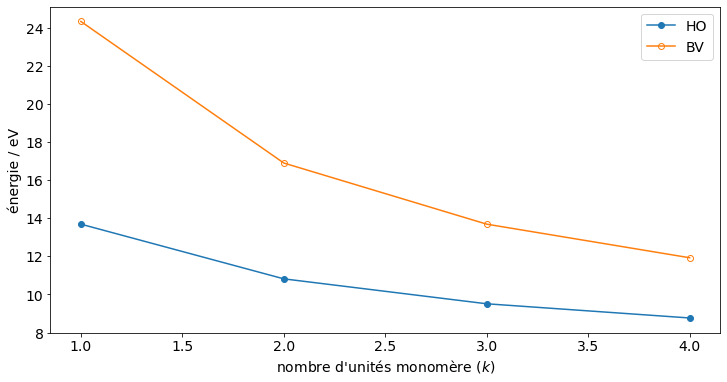

<Figure size 432x288 with 0 Axes>

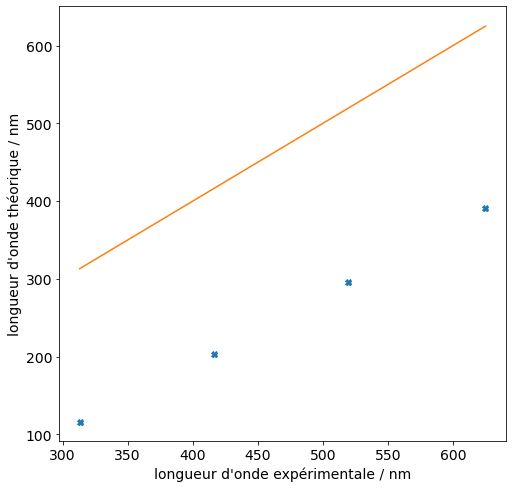

<Figure size 432x288 with 0 Axes>

In [4]:
# insérer votre code ici
k = np.arange(1,5)  #nombre d'unités monomère
npi = 2*(k+1)+2
print(f"Nombre d'unités monomères des cyanines (k) = {k}")
print(f"Nombre d'électrons pi = {npi}")
LPuits = LargeurPuits(k,0)
print(f"Largeur du puis (L/pm) = {LPuits*1e12}")

EHO,EBV = EHOBV(LPuits, npi)
print("EHO (eV) = ",EHO/elementary_charge)
print("EBV (eV) = ",EBV/elementary_charge)

plt.figure(figsize=(12,6))
plt.rcParams["font.size"] = (14) #font size
plt.plot(k,EHO/elementary_charge,marker='o',label="HO")
plt.plot(k,EBV/elementary_charge,marker='o',mfc='none',label="BV")
plt.xlabel("nombre d'unités monomère ($k$)")
plt.ylabel("énergie / eV")
plt.legend()
plt.figure()

wltheo = wavelength(LPuits, npi)*1e9
print(f"Longueurs d'onde théoriques (nm) = {wltheo}")
wlexp = np.array([313,416,519,625])

plt.figure(figsize=(8,8))
plt.rcParams["font.size"] = (14) #font size
plt.plot(wlexp,wltheo,linestyle='',marker='X')
plt.plot(wlexp,wlexp,linestyle='-')
plt.xlabel("longueur d'onde expérimentale / nm")
plt.ylabel("longueur d'onde théorique / nm")
plt.figure()


<div class="rq">

- Les orbitales frontières HO et BV se rapprochent quand *k* augmente. Si le modèle du puits infiniment profond est validé, l'effet batochrome serait dû à un rapprochement HO/BV quand *k* augmente.

- Le modèle théorique sous-estime de façon systématique les longueurs d'onde. On va voir si améliorer le modèle en augmentant la dimension du puits permet de se rapprocher de l'expérience. 
    
</div>

### Recherche de combien il faut systématiquement augmenter la taille de la boîte (du puits) pour prendre en compte les effets de bord

Vous avez en principe trouvé que le modèle théorique sous-estime de façon systématique les longueurs d'onde. On va évaluer maintenant si améliorer le modèle en augmentant la dimension du puits permet de se rapprocher de l'expérience. On va ainsi prendre en compte de façon systématique la possibilité qu'ont les électrons π de se délocaliser au-delà des carbones conjugués terminaux (cf **Figure 8**).

Il est demandé ci-dessous :

- d'ajuster le modèle en introduisant un paramètre supplémentaire, noté *b* sur la **Figure 8**. On va ainsi prendre en compte de façon systématique la possibilité qu'ont les électrons π de se délocaliser au-delà des azotes conjugués terminaux. Le paramètre est censé être le même quelle que soit la cyanine, puisque les atomes d'azote sont liés à des méthyl dans chacune des cyanines (1) à (4).
- de tracer les longueurs d'onde théorique en fonction des longueurs d'onde expérimentales, sur le modèle de la **Figure 9**. Commenter.
- de tracer EHO et EBV en fonction de k, le nombre d'unités monomères. Quel commentaire pouvez-vous faire ?


Longueurs d'onde théo avant fit = [228.89379223 327.61218516 427.46744124 527.93485442] (boîte agrandie arbitrairement de 200 pm)
Extra space après fit = [321.74996974] pm
Longueurs d'onde théo après fit = [315.82956806 417.4012909  519.07230239 620.79677699]
Largeur Puits (pm) =  [ 818.84855152 1067.3978424  1315.94713329 1564.49642417]
EHO (eV) =  [5.04728725 5.28068211 5.42857455 5.53064819]
EBV (eV) =  [8.97295511 8.25106579 7.81714736 7.52782671]


<Figure size 432x288 with 0 Axes>

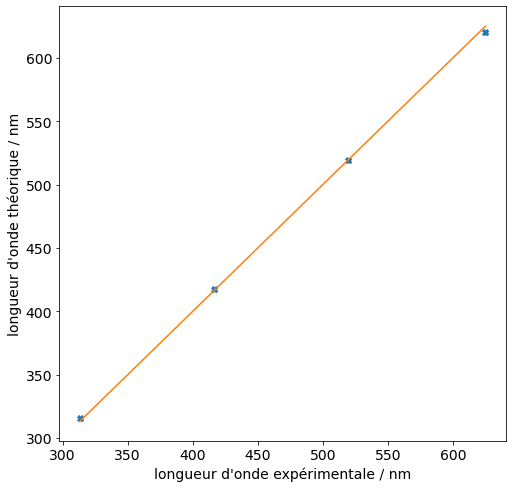

<Figure size 432x288 with 0 Axes>

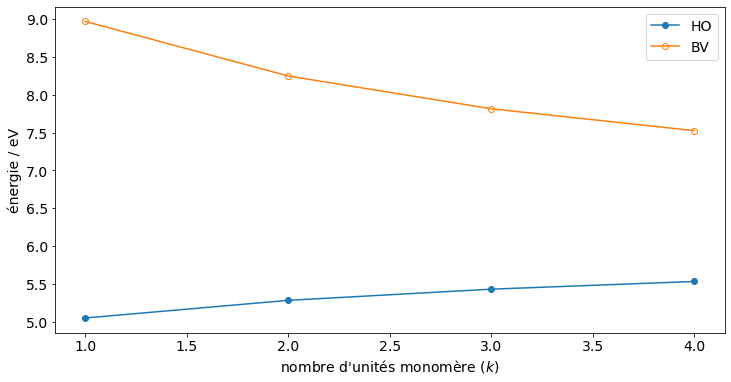

<Figure size 432x288 with 0 Axes>

In [5]:
# insérer votre code ici
def wavelength_b(k,b):
    """
    k = number of double bonds
    b = extra space of the box (in pm)
    """
    L = LargeurPuits(k,b)
    npi = 2*(k+1)+2
    return wavelength(L, npi)
b = 200
wltheo200 = wavelength_b(k, b)*1e9
print(f"Longueurs d'onde théo avant fit = {wltheo200} (boîte agrandie arbitrairement de {b} pm)")
bopt, bcov = curve_fit(wavelength_b, k, wlexp/1e9)
print(f"Extra space après fit = {bopt} pm")

wltheobFit = wavelength_b(k, bopt)*1e9
print(f"Longueurs d'onde théo après fit = {wltheobFit}")

plt.figure(figsize=(8,8))
plt.rcParams["font.size"] = (14) #font size
plt.plot(wlexp,wltheobFit,linestyle='',marker='X')
plt.plot(wlexp,wlexp,linestyle='-')
plt.xlabel("longueur d'onde expérimentale / nm")
plt.ylabel("longueur d'onde théorique / nm")
plt.figure()

LPuits = LargeurPuits(k,bopt)
print("Largeur Puits (pm) = ",LPuits*1e12)

EHO,EBV = EHOBV(LPuits, npi)
print("EHO (eV) = ",EHO/elementary_charge)
print("EBV (eV) = ",EBV/elementary_charge)

plt.figure(figsize=(12, 6))
plt.rcParams["font.size"] = (14) #font size
plt.plot(k,EHO/elementary_charge,marker='o',label="HO")
plt.plot(k,EBV/elementary_charge,marker='o',mfc='none',label="BV")
plt.xlabel("nombre d'unités monomère ($k$)")
plt.ylabel("énergie / eV")
plt.legend()
plt.figure()


<div class="rq">
    
- Le modèle théorique reproduit parfaitement les longueurs d'onde expérimentales. Le modèle des électrons π libres de se déplacer le long de la chaîne conjuguée semble validé, à condition qu'on étende un peu le puits au-delà des atomes qui participent au système conjugué. 

- Les orbitales frontières HO et BV se rapprochent quand *k* augmente. Plus précisément, la HO est déstabilisée, alors que la BV est stabilisée (c'est ce qu'on trouve dans tous les textbooks sur le sujet, même si on fait ce genre de calcul avec des hamiltoniens plus sophistiqués)
    
</div>

## On va maintenant chercher à interpréter les spectres d'absorption UV-visible de polyènes

L'unité monomérique est dessinée ci-dessous. Le "principes d"alternance" **π-σ-π** permet d'identifier que le système π s'étend entre les deux atomes de carbone qui sont liés aux fonctions méthyle.

<p style="text-align: center"><img width="650px" src="MiscImages/VUV-ConjugatedSystems/ConjugatedPolyenes.png" style="margin-left:auto; margin-right:auto" id="img_Polyenes"></img><br> <b>Figure 12</b></p>

| *k* | *nombre d'électrons π*   | λ$_{max}$ / nm |
|:---:|:--------:|:---------------------------:|
|  1  |     4    |             227             |
|  2  |     6    |             273             |
|  3  |     8    |             312             |
|  4  |    10    |             345             |
|  5  |    12    |             374             |
|  6  |    14    |             399             |
| 10  |    22    |             474             |
| 14  |    30    |             524             |
*Valeurs extraites de la référence [4]*

Le nombre d'électrons π est dans ce cas obtenu par la relation 2(*k*+1)+2, qui prend en compte les 2(*k*+1) électrons π des liaisons doubles.

### Calcul des longueurs d'onde de transition dans l'hypothèse où la largeur du puits est celle de la partie conjuguée de la molécule

C'est-à-dire qu'on se place à nouveau dans le contexte de la **Figure 5**. Pour calculer la longueur d'un segment de 2 liaisons CCC, on considère toujours que :
- on va considérer qu'une liaison simple mesure en moyenne 154 pm et que la longueur d'une liaison double est de 133 pm. 
- une liaison partielle a une longueur qui est prise comme la moyenne (simple + double)
- l'angle entre les 2 liaisons est de 120° (car les atomes sont hybridés sp2)

Vous pouvez donc utiliser la même fonction que celle développée pour les cyanines. 

Il est demandé ci-dessous de tracer les longueurs d'onde théorique en fonction des longueurs d'onde expérimentales, sur le modèle de la **Figure 9**. Commenter.

Nombre d'unités monomères des cyanines (k) = [ 1  2  3  4  5  6 10 14]
Nombre d'électrons pi = [ 4  6  8 10 12 14 22 30]
Largeur du puis (L/pm) = [ 497.09858177  745.64787266  994.19716354 1242.74645443 1491.29574532
 1739.8450362  2734.04219975 3728.23936329]
Longueurs d'onde théoriques (nm) = [ 116.39401899  203.68953323  296.27568471  391.71064084  488.85487976
  587.10512521  985.85734086 1388.79227205]


<Figure size 432x288 with 0 Axes>

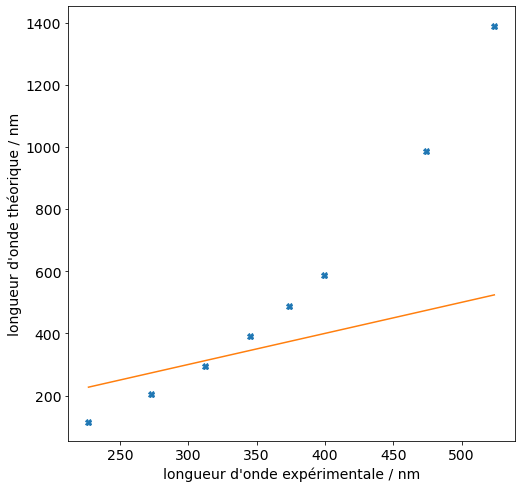

<Figure size 432x288 with 0 Axes>

In [6]:
# insérer votre code ici
kP = np.array([1,2,3,4,5,6,10,14]) #nombre d'unités monomère
npi = 2*(kP+1)
print(f"Nombre d'unités monomères des cyanines (k) = {kP}")
print(f"Nombre d'électrons pi = {npi}")
LPuitsP = LargeurPuits(kP,0)
print(f"Largeur du puis (L/pm) = {LPuitsP*1e12}")

wlexpP = np.array([227,273,312,345,374,399,474,524])
wltheoP = wavelength_b(kP, 0)*1e9
print(f"Longueurs d'onde théoriques (nm) = {wltheoP}")

plt.figure(figsize=(8,8))
plt.rcParams["font.size"] = (14) #font size
plt.plot(wlexpP,wltheoP,linestyle='',marker='X')
plt.plot(wlexpP,wlexpP,linestyle='-')
plt.xlabel("longueur d'onde expérimentale / nm")
plt.ylabel("longueur d'onde théorique / nm")
plt.figure()

### Prise en compte de l'effet de bord et d'un paramètre supplémentaire : le shift en énergie de la HO

Le graphe que vous venez de tracer montre que le modèle de puits de potentiel infiniment profond est insuffisant. Et au vu de l'évolution des longueurs d'onde théoriques en fonction des longueurs d'onde expérimentales, augmenter la lareur du puits ne suffira pas. Le modèle ne capture pas les effets physico-chimiques à l'oeuvre dans ces polyènes. En fait, il est connu que la délocalisation est moins forte dans les polyènes que dans les cyanines. Le modèle d'électrons π libres de se déplacer le long d'un squelette carboné est donc trop permissif. Il a été démontré dans la Réf. [1], par des méthodes théoriques qui dépassent de très loin le cadre de cet enseignement, que d'un point de vue pragmatique il est possible de corriger ce comportement en décalant de façon systématique l'énergie de la HO, l'énergie de la BV étant très peu affectée par cette délocalisation plus faible. 

On va donc ajuster le modèle avec deux paramètres :
- l'augmentation de la dimension de la boîte par un paramètre *b*, caractéristique des fonctions terminales (ici les fonctions -CH3)
- la variation de l'énergie de la HO par un paramètre *shiftHO* indépendant de la taille du polyène, qui prend en compte une moins forte déstabilisation de la HO pour cause de délocalisation moins élevée

Vous devez dans la cellule ci-dessous :
- définir la nouvelle fonction à ajuster
- procéder à l'ajustement des paramètres *b* et *shiftHO* de façon à essayer de reproduire les longueurs d'onde expérimentales (il est conseillé de donner deux valeurs initiales pour faciliter l'ajustement)
- tracer les longueurs d'onde théorique en fonction des longueurs d'onde expérimentales, sur le modèle de la **Figure 9**. Commenter.
- tracer EHO et EBV en fonction de k, le nombre d'unités monomères. Quel commentaire pouvez-vous faire ?


[211.09010583 289.62892544 361.82198582 428.39157357 489.96408809
 547.07922349 739.40646852 888.52011919]
Taille de la boîte augmentée de 202.1 pm
L'énergie de la HO sera ajustée de -1.6 eV
[227.17110315 272.9587087  311.79384751 345.06306645 373.85462463
 399.00394002 474.15302042 523.97110719]
Largeur Puits (pm) =  [ 699.17282394  947.72211483 1196.27140572 1444.8206966  1693.36998749
 1941.91927838 2936.11644192 3930.31360546]
EHO (eV) =  [1.46528326 2.15631466 2.59258033 2.89172222 3.1092455  3.27441498
 3.66628594 3.86548327]
EBV (eV) =  [6.9230284  6.69854741 6.56906028 6.48481028 6.42562011 6.38175769
 6.28114218 6.2317244 ]


<Figure size 432x288 with 0 Axes>

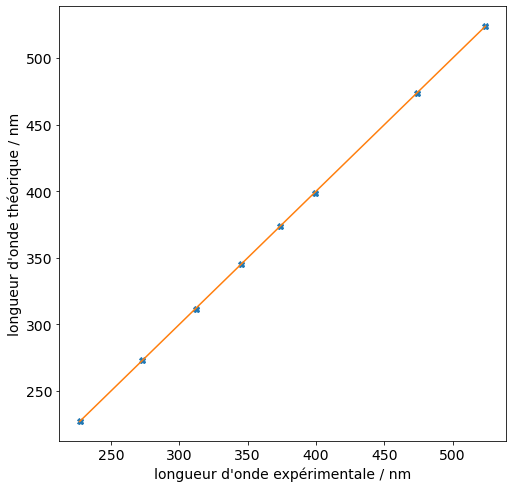

<Figure size 432x288 with 0 Axes>

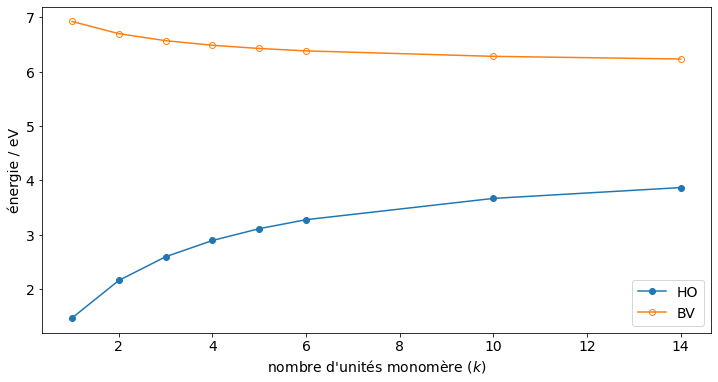

<Figure size 432x288 with 0 Axes>

In [7]:
# insérer votre code ici
def wavelengthP(k,b,shiftHO):
    L = LargeurPuits(k,b)
    npi = 2*(k+1)
    return wavelengthHO(L, npi, shiftHO)

def wavelengthHO(BL, npi, shiftHO):
    """
    BL is the box length in m
    npi is the total number of pi electrons
    shiftHO is the shift of the HO in eV (1 eV = |e| J)
    returns wavelength in m
    """
    EHO, EBV = EHOBV(BL, npi)
    l = h * c / (EBV-(EHO+(shiftHO/2)*elementary_charge))
    return l

b = 100
shiftHO = -1.2
wltheo2 = wavelengthP(kP, b, shiftHO)*1e9
print(wltheo2)

PoptP, bcovP = curve_fit(wavelengthP, kP, wlexpP/1e9)
boptP = PoptP[0]
shiftHOP = PoptP[1]
print(f"Taille de la boîte augmentée de {boptP:.1f} pm\nL'énergie de la HO sera ajustée de {shiftHOP/2:.1f} eV")
wltheoPfit = wavelengthP(kP, boptP, shiftHOP)*1e9
print(wltheoPfit)

plt.figure(figsize=(8,8))
plt.rcParams["font.size"] = (14) #font size
plt.plot(wlexpP,wltheoPfit,linestyle='',marker='X')
plt.plot(wlexpP,wlexpP,linestyle='-')
plt.xlabel("longueur d'onde expérimentale / nm")
plt.ylabel("longueur d'onde théorique / nm")
plt.figure()

LPuitsP = LargeurPuits(kP,boptP)
print("Largeur Puits (pm) = ",LPuitsP*1e12)
npiP = 2*(kP+1)

EHOP,EBVP = EHOBV(LPuitsP, npiP)
EHOP = EHOP+(shiftHOP*elementary_charge/2)
print("EHO (eV) = ",EHOP/elementary_charge)
print("EBV (eV) = ",EBVP/elementary_charge)

plt.figure(figsize=(12, 6))
plt.rcParams["font.size"] = (14) #font size
plt.plot(kP,EHOP/elementary_charge,marker='o',label="HO")
plt.plot(kP,EBVP/elementary_charge,marker='o',mfc='none',label="BV")
plt.xlabel("nombre d'unités monomère ($k$)")
plt.ylabel("énergie / eV")
plt.legend()
plt.figure()

<div class="rq">
    
- Le modèle théorique reproduit parfaitement les longueurs d'onde expérimentales. Le modèle des électrons π libres de se déplacer le long de la chaîne conjuguée semble validé, à condition qu'on étende un peu le puits au-delà des atomes qui participent au système conjugué et qu'on introduise de façon empirique l'effet sur la posotion de la HO d'une délocalisation moins forte. 

- Les orbitales frontières HO et BV se rapprochent quand *k* augmente. Plus précisément, la HO est déstabilisée, alors que la BV est stabilisée. C'est le même phénomène déjà observé pour les cyanines, même si ici l'évolution en fonction de *k* est différente.
    
</div>

### Examen des fonctions d'onde HO et BV et de leur énergie

#### Sélection d'un des polyènes

Sélectionnez l'octatétraène (*k* = 4). Sauvez dans des variables et affichez :
- Le nombre d'atomes appartenant au système pi
- Le nombre d'électrons pi
- La largeur de la partie conjuguée (*L*)
- La largeur effective du puits (*L*')
- Le nombre quantique de la HO
- Le nombre quantique de la BV
- L'énergie de chacune de ces deux orbitales

Puis créez un tableau `xAtomes` qui contient les positions des atomes qui appartiennent au système conjugué.

In [8]:
# insérer votre code ici
P = 3 # polyene index
print(kP[P]) #number polymer units
nAtoms = ((kP[P]+1)*2)
print(f"Nombre d'atomes appartenant au système pi = {nAtoms}")
print(f"Nombre d'électrons pi = {npiP[P]}")
LargeurMol = LargeurPuits(kP[P], 0)
print(f"Largeur de la partie conjuguée de la molécule = {LargeurMol*1e12:.1f} pm\nLargeur du puits = {LPuitsP[P]*1e12:.1f} pm\nExtra space = {boptP:.1f} pm")
print(f"Distance entre deux atomes = {LargeurMol*1e12/(nAtoms):.1f} pm")

nHO = npiP[P]/2
nBV = npiP[P]/2+1
epsHO = EHOP[P]/elementary_charge
epsBV = EBVP[P]/elementary_charge
print(f"EHO = {epsHO:.1f} eV (nOM = {nHO:.0f})\nEBV = {epsBV:.1f} eV (nOM = {nBV:.0f})")

xAtomes = []
for i in range(nAtoms):
    xAtomes.append(boptP/2 + (i * LargeurMol*1e12/(nAtoms-1)))
    
print(f"Coordonnées des atomes appartenant au système pi (pm) =\n{xAtomes}")

4
Nombre d'atomes appartenant au système pi = 10
Nombre d'électrons pi = 10
Largeur de la partie conjuguée de la molécule = 1242.7 pm
Largeur du puits = 1444.8 pm
Extra space = 202.1 pm
Distance entre deux atomes = 124.3 pm
EHO = 2.9 eV (nOM = 5)
EBV = 6.5 eV (nOM = 6)
Coordonnées des atomes appartenant au système pi (pm) =
[101.03712108608912, 239.12006046727458, 377.2029998484601, 515.2859392296456, 653.368878610831, 791.4518179920165, 929.534757373202, 1067.6176967543875, 1205.700636135573, 1343.7835755167584]


#### Vérification que les fonctions d'onde de ce polyène sont normées

Au passage, on va vérifier que les fonctions d'onde $\psi_1$ à $\psi_\mathrm{BV}$ sont toutes normées. C'est-à-dire que l'intégrale *I* ci-dessous est égale à 1 quelle que soit la valeur de *i*.

$$I=\int_{0}^{L'}\psi_{i}{}^{2}dx$$

In [9]:
# insérer votre code ici
def psi2(x, n ,L):
    return psi(x,n,L)**2

for i in np.arange(1,nBV+1):
    I, err = quad(psi2,0,LPuitsP[P],args=(i,LPuitsP[P]))
    print(f"état {i:.0f} : I = {I:.1f}, err = {err:.0e}")

état 1 : I = 1.0, err = 1e-14
état 2 : I = 1.0, err = 7e-10
état 3 : I = 1.0, err = 1e-14
état 4 : I = 1.0, err = 7e-10
état 5 : I = 1.0, err = 1e-14
état 6 : I = 1.0, err = 1e-14


#### États HO & BV : tracé des fonctions d'onde et des niveaux d'énergie

On demande maintenant de reporter sur un graphique qui aura la largeur du puits de l'octatétraène ($k$ = 4)
- de tracer des traits horizontaux qui correspondent aux énergies des HO et BV
- d'y tracer les fonctions d'onde $\psi_\mathrm{HO}$ et $\psi_\mathrm{BV}$
- de représenter également la position des atomes de carbones impliqués dans le système conjugué, afin de voir ce qu'on appelle les noeuds de la fonction d'onde, c'est-à-dire entre quels atomes la fonction d'onde s'annule

On demande un graphe qui ressemble à ceci :

<p style="text-align: center"><img width="350px" src="MiscImages/VUV-ConjugatedSystems/PsiHOBV-Puits-keep.png" style="margin-left:auto; margin-right:auto" id="img_PsiHOBV-Puits1D"></img><br> <b>Figure 13</b></p>

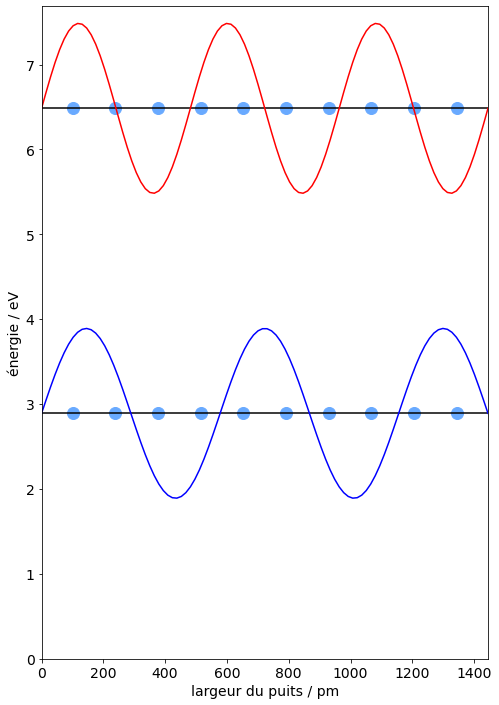

In [10]:
# insérer votre code ici

plt.figure(figsize=(8, 12))
plt.rcParams["font.size"] = (14) #font size
plt.xlim(0.,LPuitsP[P]*1e12)
plt.ylim(0.,epsBV+1.2)
x = np.linspace(0,LPuitsP[P],100) # in m

yAtomes = [epsHO]*nAtoms
plt.plot(xAtomes,yAtomes,marker='o',linestyle=' ',markersize=12,color='#69aaff')
yAtomes = [epsBV]*nAtoms
plt.plot(xAtomes,yAtomes,marker='o',linestyle=' ',markersize=12,color='#69aaff')
plt.axhline(epsHO,0,LPuitsP[P]*1e12,color='black')
plt.axhline(epsBV,0,LPuitsP[P]*1e12,color='black')
plt.plot(x*1e12,epsHO+psi(x, nHO, LPuitsP[P])/np.max(psi(x, nHO, LPuitsP[P])),linestyle='-',color='blue')
plt.plot(x*1e12,epsBV+psi(x, nBV, LPuitsP[P])/np.max(psi(x, nBV, LPuitsP[P])),linestyle='-',color='red')
plt.xlabel("largeur du puits / pm")
plt.ylabel("énergie / eV")
plt.savefig("./MiscImages/VUV-ConjugatedSystems/PsiHOBV-Puits.png", dpi=300)

## Transférabilité des paramètres au β-carotène

Le [β-carotène](https://fr.wikipedia.org/wiki/B%C3%AAta-Carot%C3%A8ne) est un antioxydant de la famille des caroténoïdes. Principalement retrouvé dans les produits d’origine végétale tels que les carottes, les épinards ou encore les tomates, il joue un rôle essentiel dans l'organisme dans la synthèse de la viamine A. Sous forme pure, il se présente comme une poudre rouge. Sa structure de Lewis et son spectre d'absorption sont les suivants :

<p style="text-align: center"><img width="700px" src="MiscImages/VUV-ConjugatedSystems/Figure-beta-carotene.png" style="margin-left:auto; margin-right:auto" id="img_VisPolyenes"></img><br> <b>Figure 13</b></p>

Utilisez le modèle théorique approprié pour prédire la longueur d'onde d'absorption théorique du β-carotène. 

In [11]:
# insérer votre code ici
# C'est un polyène conjugué. On va se servir du modèle fitté pour les polyènes, càd des paramètres ShiftHOP & boptP,
# même si boptP est peut-être inadapté ici, puiqu'il a été optimisé pour des méthyl terminaux et des ployènes relativement courts

kPbc = 11
npiPbc = 2*(kPbc+1)

LPuitsPbc = LargeurPuits(kPbc,boptP)
print(f"Largeur Puits (pm) = {LPuitsPbc*1e12:.0f} pm")

EHOPbc,EBVPbc = EHOBV(LPuitsPbc, npiPbc)
EHOPbc = EHOPbc+(shiftHOP*elementary_charge/2)
print(f"EHO (eV) = {EHOPbc/elementary_charge:.1f} eV")
print(f"EBV (eV) = {EBVPbc/elementary_charge:.1f} eV")

wltheoPbc = wavelengthP(kPbc, boptP, shiftHOP)*1e9
print(f"λmax théorique du β-carotène = {wltheoPbc:.1f} nm")

Largeur Puits (pm) = 3185 pm
EHO (eV) = 3.7 eV
EBV (eV) = 6.3 eV
λmax théorique du β-carotène = 488.4 nm


Vous avez en principe trouvé 488 nm, une longueur d'onde légèrement surestimée par rapport à l'expérience (450nm). C'est probablement la dimension de la boîte qui est surestimée, car en pratique un polyène d'une telle longueur a tendance a légèrement "onduler" :

<p style="text-align: center"><img width="700px" src="MiscImages/VUV-ConjugatedSystems/beta-carotene3D.png" style="margin-left:auto; margin-right:auto" id="img_betacarotene3D"></img><br> <b>Figure 14</b></p>

Faire la même estimation en réduisant légèrement la largeur de la boîte de 200 pm. Vous devriez constater que ça va dans le bon sens.

In [12]:
# insérer votre code ici
boptPbc = boptP - 200
wltheoPbc = wavelengthP(kPbc, boptPbc, shiftHOP)*1e9
print(f"λmax théorique du β-carotène après réduction de la dimension de la boîte = {wltheoPbc:.1f} nm")

λmax théorique du β-carotène après réduction de la dimension de la boîte = 464.9 nm


## Bilan

<div class="warn">
    
Il est assez inespéré que l'ajustement théorie-expérience soit aussi bon, compte tenu de la simplicité du modèle théorique sous-jacent, le puits de potentiel infiniment profond ("particle in a box") .
    
L'intérêt des deux modèles dérivés du puits de potentiel est qu'on a mis en avant et exploité :
    
- le fait que la délocalisation est plus forte dans les cyanines que dans polyènes conjugués
- que la conséquence d'une délocalisation moins forte dans les polyènes conjugués entraîne une stabilisation de l'énergie de la HO, qui est un paramètre constant indépendant de $k$, le nombre d'unités monomères
    
</div>

## Références bibliographiques

[1] J. Autschbach, "[Why the Particle-in-a-Box Model Works Well for Cyanine Dyes but Not for Conjugated Polyenes](https://dx.doi.org/10.1021/ed084p1840)" (**2007**), *J. Chem. Educ.* **84**: 1840-1845

[2] P. Nayler et M. C. Whitting, "[Researches on Polyenes. Part III. The Synthesis and Light Absorption of Dimethylpolyenes](https://dx.doi.org/10.1039/JR9550003037)" (**1955**), *J. Chem. Soc.* 3037-3047

[3] M. Klessinger, "[Konstitution und Lichtabsorption organischer Farbstoffe](https://dx.doi.org/10.1002/ciuz.19780120102)" (**1978**), *Chem. Unserer Zeit* **12**: 1-11

[4] M. Klessinger et J. Michl, Excited States and Photo-Chemistry of Organic Molecules, Revised and Improved English-Language Edition (**1996**), Wiley-VCH. 


In [13]:
vID.end(cwd0)

**End at:** Sunday 01 January 2023, 15:24:39  
**Duration:** 00:00:02 225ms

<p style="text-align: center"><img width="800px" src="../config/svg/logoEnd.svg" style="margin-left:auto; margin-right:auto"/></p>